OTTIMIZZAZIONE DEL TEMPO D'INTERVENTO DEL MECCANICO NELLE PRESSE(MONTAGGIO E SMONTAGGIO DELLO STAMPO).

In [1]:
#ottimizzazione del tempo di montaggio e smontaggio dello stampo nella pressa

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as standardscaler
import scipy.stats as stats

In [3]:
#costruzione dataframe

In [4]:
Reparto=['R3','R1','R4','R2','R5','R3','R1','R5','R1','R2','R4','R4','R4','R2','R1','R4','R5','R3','R5','R1']
Tempo_A=[20,15,25,40,27,15,50,15,25,20,12,40,10,41,60,18,12,50,45,16]
Tempo_M=[0,0,250,120,130,0,160,0,200,180,0,205,0,210,160,0,0,158,170,0]
Tempo_S=[90,80,0,0,0,100,0,135,0,0,100,0,90,0,0,120,103,0,0,115]
Tempo_G=[35,0,25,0,0,40,0,0,0,0,41,31,25,0,0,25,0,24,30,0]
Tempo_P=[20,15,0,0,0,18,0,17,0,0,45,0,25,0,0,17,23,0,0,13]
Mon_Smon=['s','s','m','m','m','s','m','s','m','m','s','m','s','m','m','s','s','m','m','s']
Stampo=['p4.0','3.3gel','p4.4','CC4.4','5pGel','p10p','p10.O','p6.6','CC15','p1','p15R','p15Q','p5.5','CC5','p20','p8.O','P3O','P10E','P3CC','P8A']

In [5]:
data={'Reparto':Reparto,'Tempo_A':Tempo_A,'Tempo_M':Tempo_M,'Tempo_S':Tempo_S,'Tempo_P':Tempo_P,'Tempo_G':Tempo_G,'Stampo':Stampo,'Mon_Smon':Mon_Smon}

In [6]:
df=pd.DataFrame(data)

In [7]:
#osseervazione tabella

In [8]:
df.shape

(20, 8)

In [9]:
#df.set_index(['Stampo','Reparto'])
df.head()

,Reparto,Tempo_A,Tempo_M,Tempo_S,Tempo_P,Tempo_G,Stampo,Mon_Smon
0,R3,20,0,90,20,35,p4.0,s
1,R1,15,0,80,15,0,3.3gel,s
2,R4,25,250,0,0,25,p4.4,m
3,R2,40,120,0,0,0,CC4.4,m
4,R5,27,130,0,0,0,5pGel,m


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Reparto   20 non-null     object
 1   Tempo_A   20 non-null     int64 
 2   Tempo_M   20 non-null     int64 
 3   Tempo_S   20 non-null     int64 
 4   Tempo_P   20 non-null     int64 
 5   Tempo_G   20 non-null     int64 
 6   Stampo    20 non-null     object
 7   Mon_Smon  20 non-null     object
dtypes: int64(5), object(3)
memory usage: 1.4+ KB


In [11]:
#controllo valore nan
df.isnull().sum()

Reparto     0
Tempo_A     0
Tempo_M     0
Tempo_S     0
Tempo_P     0
Tempo_G     0
Stampo      0
Mon_Smon    0
dtype: int64

In [12]:
#analisi variabili quantitativa

In [13]:
df.describe()

,Tempo_A,Tempo_M,Tempo_S,Tempo_P,Tempo_G
count,20.000000,20.000000,20.000000,20.000000,20.00000
mean,27.800000,97.150000,46.650000,9.650000,13.80000
std,15.340349,94.207651,54.063583,12.591873,16.23706
min,10.000000,0.000000,0.000000,0.000000,0.00000
25%,15.000000,0.000000,0.000000,0.000000,0.00000
50%,22.500000,125.000000,0.000000,0.000000,0.00000
75%,40.250000,172.500000,100.000000,17.250000,26.25000
max,60.000000,250.000000,135.000000,45.000000,41.00000


In [14]:
#analisi variabili qualitativa
df.describe(include='object')

,Reparto,Stampo,Mon_Smon
count,20,20,20
unique,5,20,2
top,R1,p4.0,m
freq,5,1,11


<Axes: >

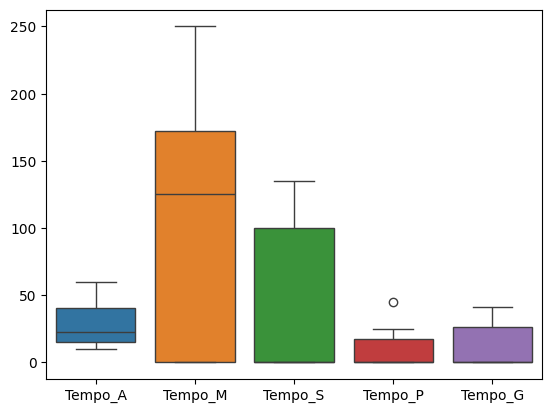

In [15]:
#analisi descritivi dei variabili qtitiva
sns.boxplot(data=df)

In [16]:
#normalità della distribuzione
#or colunm in df.colunms[:-1]:
   #plt,figure(figsize=(12,4))
   #sns,histplot(data=df,x=colunm,kde=True)
   #plt.title(f'histogram della varianile{colunm}')
   #plt.show()

    #statistic,p_value=stats.normaltest(df(colunm))
    #if p_value<0.05:
        #print(f'la variabile{colunm}non è distribuita (p_value={p_value})')
    #else:
        #print(f'la variabile{colunm}è distribuita(p_value={p_value})')


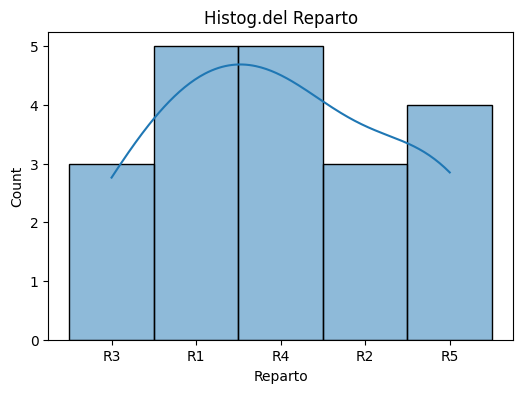

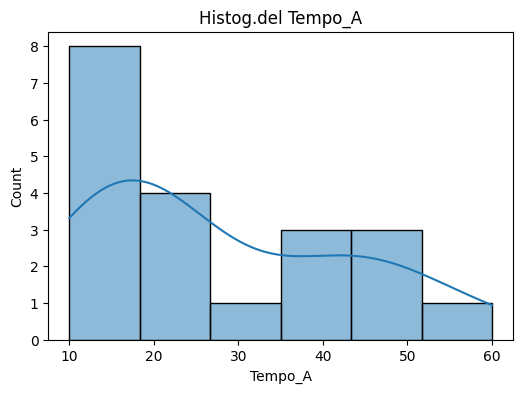

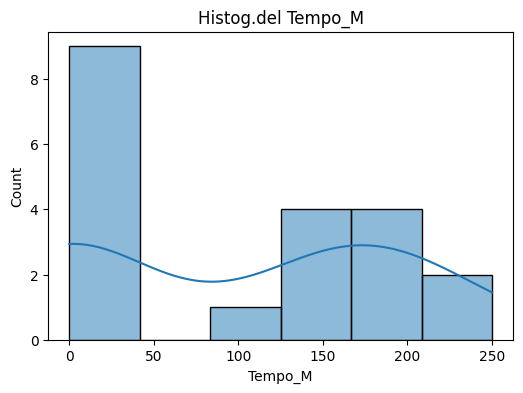

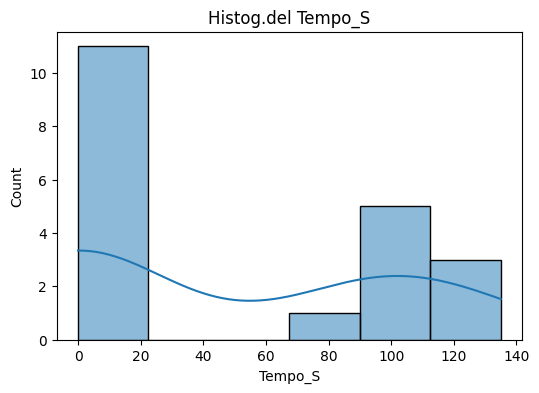

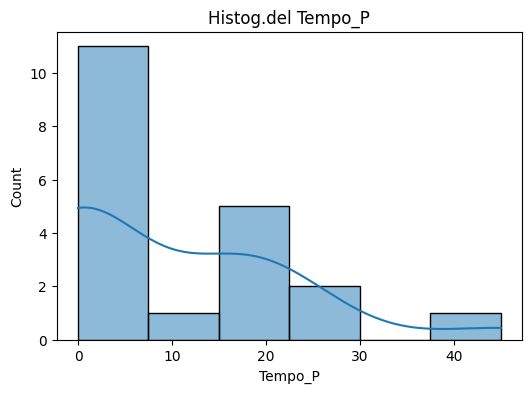

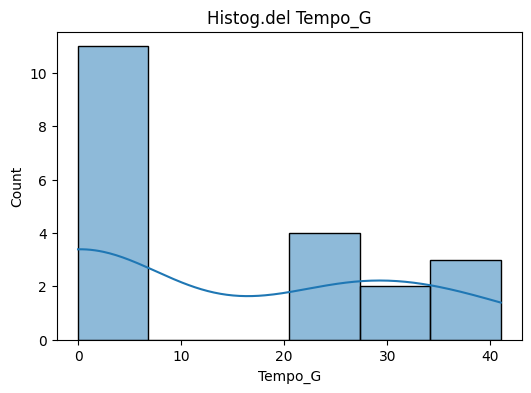

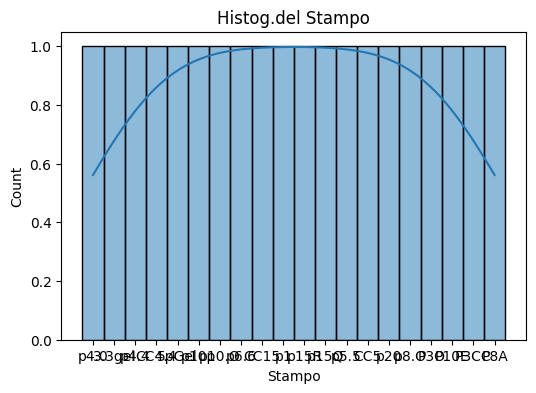

In [17]:
#ANALISI UNIVARIATA
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histog.del {column}")
    plt.show()

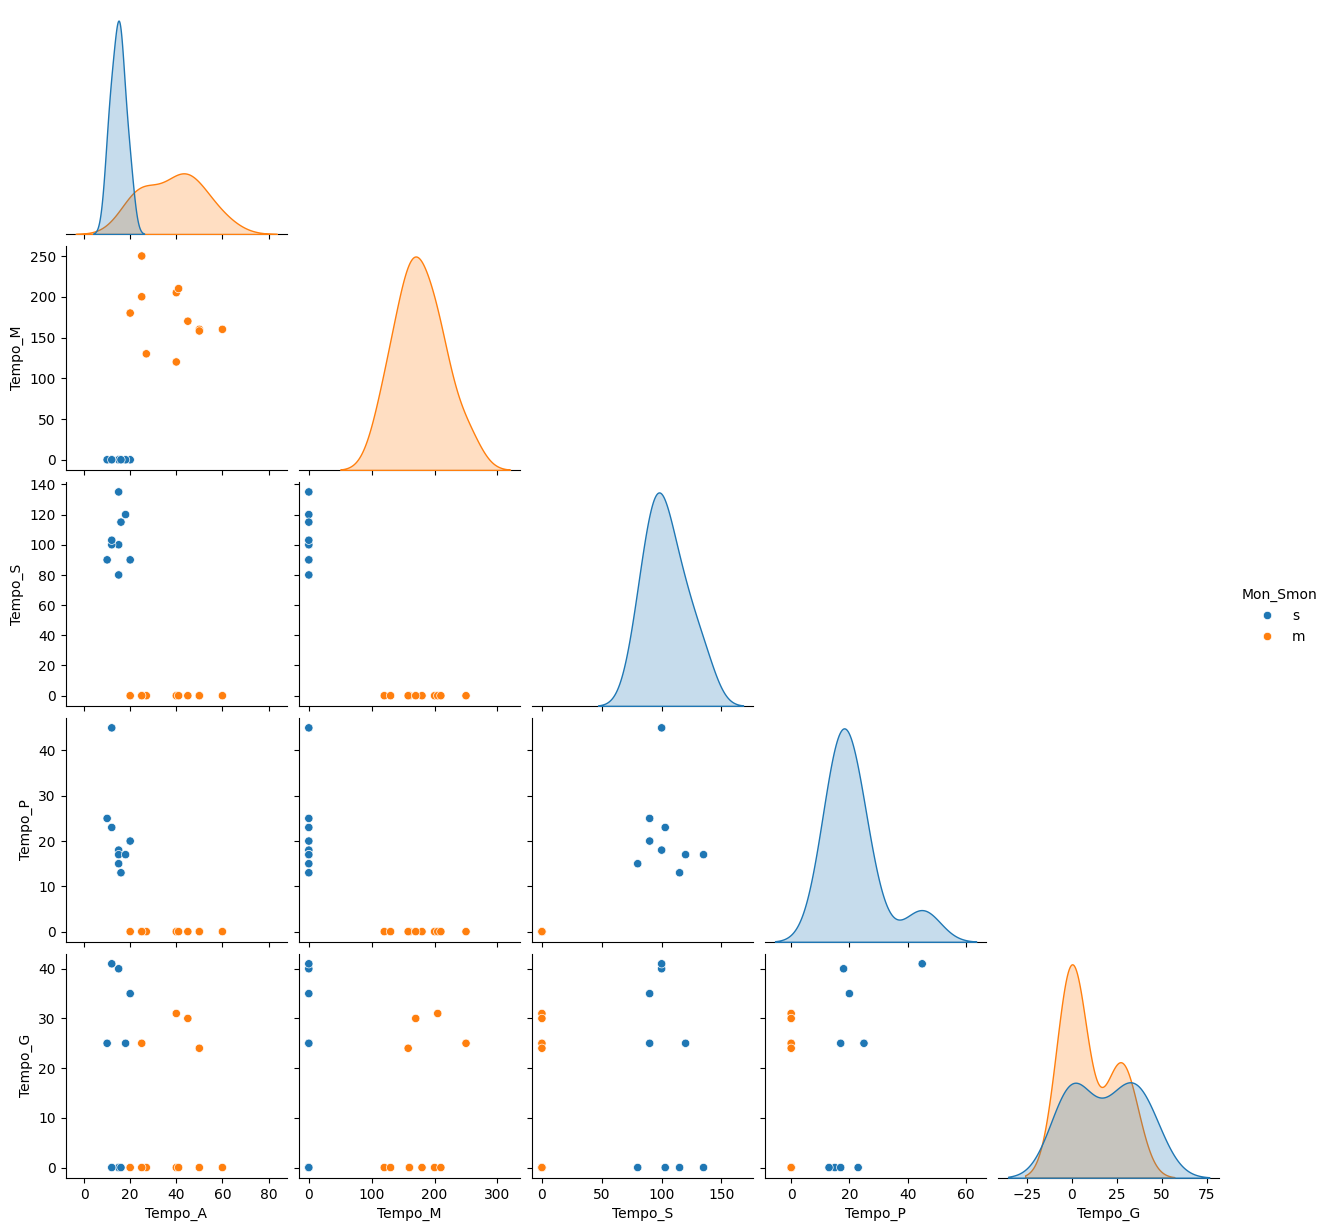

In [18]:
sns.pairplot(df,hue='Mon_Smon',corner=True);

<ipython-input-19-f607f9e55e8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Reparto'],palette='inferno');


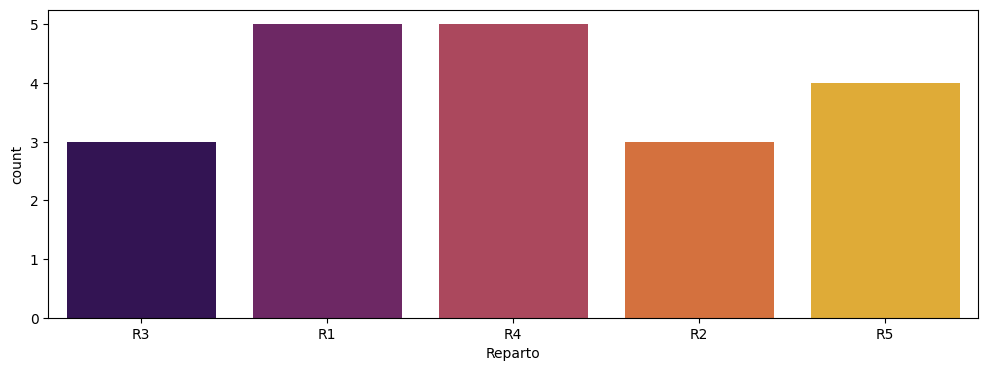

In [19]:
#analisi descrittivi qualitativi
plt.figure(figsize=(12,4))
sns.countplot(x=df['Reparto'],palette='inferno');

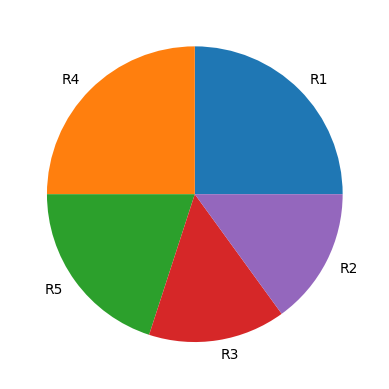

In [20]:
freq_table=(df['Reparto'].value_counts())/len(df)
freq_table
plt.pie(freq_table,labels=freq_table.index);

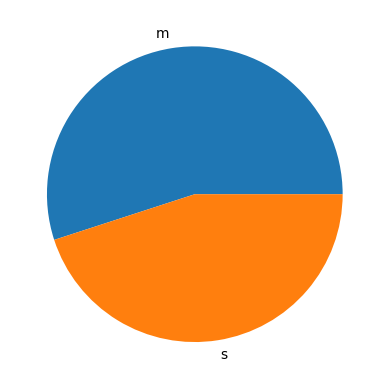

In [21]:
freq_tabl=(df['Mon_Smon'].value_counts())/len(df)
plt.pie(freq_tabl,labels=freq_tabl.index);

<ipython-input-22-84e641cb3eeb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


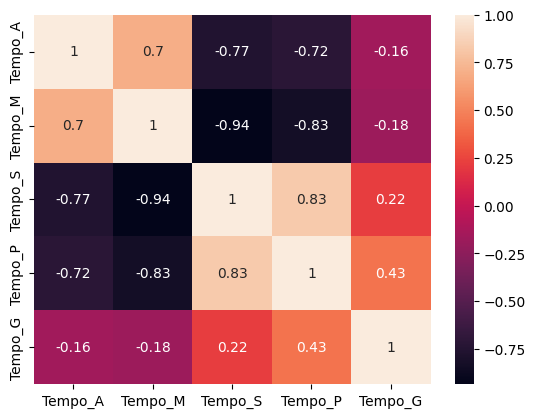

In [22]:
#osservazione di correlazione heatmap
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True);

In [31]:
#ANALISI ACP in R o MALTLAB
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df[['Tempo_A','Tempo_M','Tempo_S','Tempo_P','Tempo_G']].values
y = df.iloc[:, 0].values

In [41]:
df1=df[['Reparto','Tempo_A','Tempo_M','Tempo_S','Tempo_P','Tempo_G',]]

In [29]:
# Standardisation des données
# Normaliser of database
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimention" : ["Dim" + str(x + 1) for x in range(4)],
        "value" : pca.explained_variance_,
        "% variance" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimention", "Value", "% variance", "% cum. var"]
)
comp

ValueError: All arrays must be of the same length

In [ ]:
 #Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension",
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

AttributeError: 'DataFrame' object has no attribute 'feature_names'

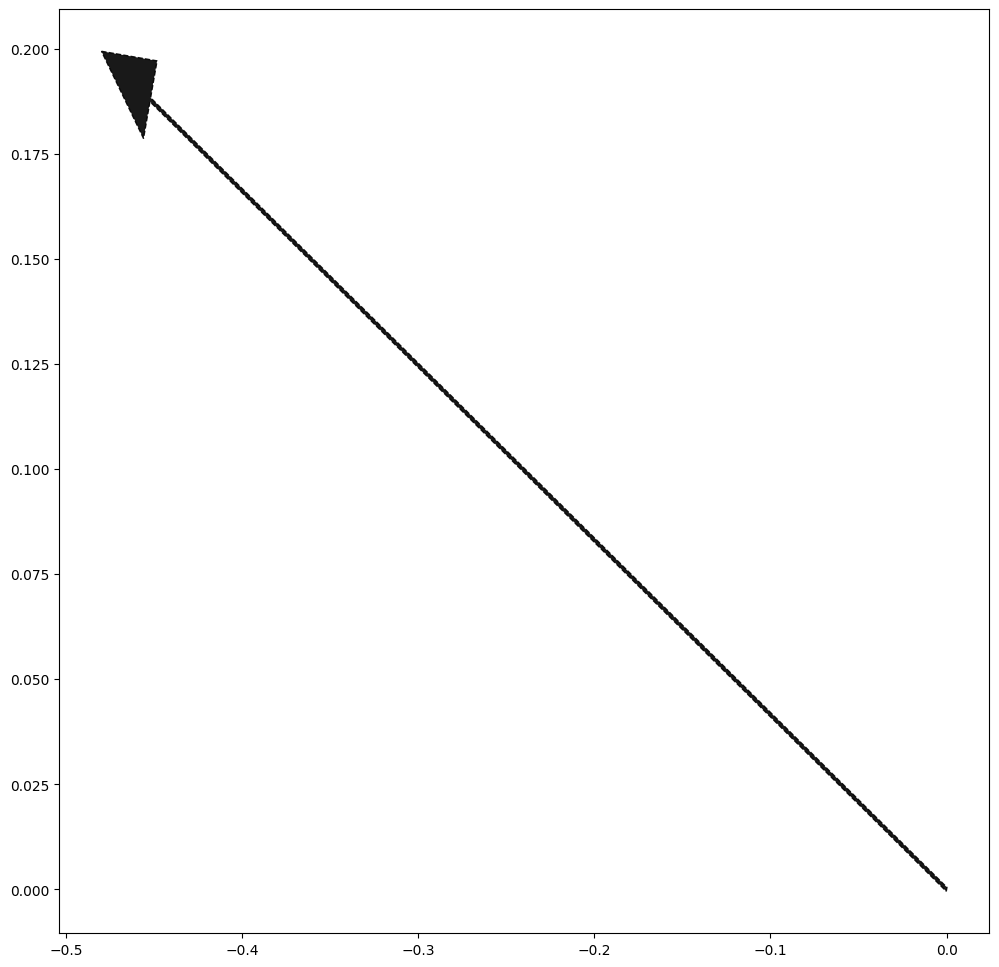

In [42]:
# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# circon di corre
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# fig subplot
fig, ax = plt.subplots(figsize=(12, 12))

# color
colors = ['r', 'g', 'b']
lw = 2

for color, i,Reparto in zip(colors, [0, 1, 2], Reparto):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=Reparto)

# vector
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df1.feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP of stampo')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()